# Lab 3: Gesture Recognition using Convolutional Neural Networks

**Deadlines**: Feb 8, 5:00PM

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TAs**: 
Geoff Donoghue  

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins. 

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://drive.google.com/file/d/10gbDHrr7ubAkgbQJhCLHRMdciv4EAp5E/view?usp=sharing

## Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
import torch.optim as optim 
import torchvision.datasets
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6dgyshY2_f3ejWdwJm1EDiaF7M-vNPfWUwv_L-kQLhTA_Z4hDHDJU


In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/APS360_Labs/LAB_3/Lab_3_Gesture_Recognition.ipynb

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
) 

In [ ]:
# Returns a list of indices that have labels corresponding to one of target classes
def get_indices(dataset, classes, target_classes):
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] 
        label_class = classes[label_index] 
        if label_class in target_classes:
            indices.append(i)
    return indices

In [ ]:
# Code taken from Lab 2 as a reference
# Function loads images of hands and splits the data into training, validation
#and testing datasets. Returns data loaders for the three preprocessed datasets.
def get_data_loader(target_classes, batch_size):
    """
    Args:
        target_classes: A list of strings denoting the name of the desired classes. 
        batch_size: A int representing the number of samples per batch
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """
    # Data has been split manually for train and test datasets
    # making sure that each set isn't biased towards a certain gesture 
    # (there is the same proportion of each class in in each set)
    train_path = '/content/drive/MyDrive/APS360_Labs/LAB_3/train_dataset/'
    test_path = '/content/drive/MyDrive/APS360_Labs/LAB_3/test_dataset/'
    classes = ['A','B','C','D','E','F','G','H','I']
    ########################################################################
    # The output of datasets are images of 224 x 224 px
    # We transform them to Tensors.
    transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
    # Load training data
    trainset = torchvision.datasets.ImageFolder(root=train_path, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # Split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load testing data
    testset = torchvision.datasets.ImageFolder(root=test_path, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes


In [ ]:
# This will download the dataset
train_loader, val_loader, test_loader, classes = get_data_loader(
     target_classes = ['A','B','C','D','E','F','G','H','I'], 
     batch_size=1)

training_examples = len(train_loader)
training_examples = "The number of training examples is {}".format(training_examples)
print(training_examples)
validation_examples = len(val_loader)
validation_examples = "The number of validation examples is {}".format(validation_examples)
print(validation_examples)
test_examples = len(test_loader)
test_examples = "The number of test examples is {}".format(test_examples)
print(test_examples)

The number of training examples is 1540
The number of validation examples is 386
The number of test examples is 500


SAMPLE FROM TRAIN DATASET


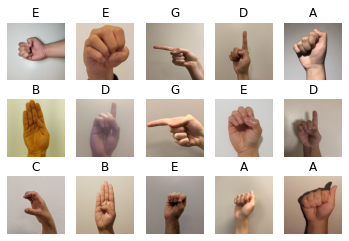

In [ ]:
def show_data(data_loader, classes):
  k = 0
  fig = plt.figure()
  for images, labels in data_loader:
      # since batch_size = 1, there is only 1 image in `images`
      image = images[0]
      # place the colour channel at the end, instead of at the beginning
      img = np.transpose(image, [1,2,0])
      sub_fig = plt.subplot(3, 5, k+1)
      sub_fig = plt.title(classes[labels[0]])
      plt.axis('off')
      plt.imshow(img)
      k += 1
      if k > 14:
          break

print("SAMPLE FROM TRAIN DATASET")
show_data(train_loader, classes)

### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

The neural network architecture I have built has 2 convolutional layers connected to 2 fully connected layers.
I used a max pooling layer with a 2x2 kernel, and a stride length and 2 in between the two convoluional layers.
I have abstracted the RGB input layers firstly to 5 and then to 10 layers in order to extract from this dataset as much dimensional information as possible.
ReLu activation function seemed to be the best choice to use since we do not need negative numbers.



In [ ]:
class GestureRec(nn.Module):
    def __init__(self): #initialization of class GestureRec
        super(GestureRec, self).__init__()
        self.name = "GestureRec"
        #Conv2d takes as inputs 3 = num of in-channels (RGB), 5 = num of output-channels, 5(X5) = convolving kernel size
        self.conv1 = nn.Conv2d(3, 5, 5) 
        #Maxpool function takes as inputs kernel size (length and height) and stride. 
        #Kernel is applied on each feature map @ stride 2, to generate 5 110x110 feature maps per image
        self.pool = nn.MaxPool2d(2, 2)
        #Conv2d takes as inputs 5 = num of in-channels, 10 = num of out-channels, 5 = convolving kernel size. 
        self.conv2 = nn.Conv2d(5, 10, 5)
        #nn.Linear function applies linear transform to the data
        #takes as inputs (10*53*53) = size of input sample and 32 = size of output 
        self.fc1 = nn.Linear(28090, 32)
        #Same thing as above, 32 = size of input and 9 is size of output letters A-I
        self.fc2 = nn.Linear(32, 9) 

    def forward(self, x):
        #Apply pooling to the Relu activation function (1st convolution)
        x = self.pool(F.relu(self.conv1(x)))
        #Apply pooling to the Relu activation function (2nd convolution)
        x = self.pool(F.relu(self.conv2(x)))
        #Flattens the images output of the second convolution to a 250 column tensor
        x = x.view(-1, 28090)
        # Apply Relu activation to the first linear transformation (size=32)
        x = F.relu(self.fc1(x))
        #Applies Relu activation to the linear transformation (size=1)
        x = self.fc2(x)
        #x = x.squeeze(1) # Flatten to [batch_size]
        return x

### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
def accuracy(net, data_loader):
  correct = 0
  total = 0
  for imgs, labels in data_loader:
      if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
      output = net(imgs)
      #select index with maximum prediction score
      pred = output.max(1, keepdim=True)[1]
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
  return correct / total

The Loss funtion I have selected for training is CrossEntropyLoss because it can minimize the distance between two probability distributions (predicted and actual) really well.
I have used Adam Optimizer because it is more efficient than SGD when the classification style is multivariate (i.e. we do not only classify in terms of 0/1; here we have 9 potential lassifications for letterf drom A to I)


In [ ]:
def train_net(net, train_loader, val_loader, batch_size=64, learning_rate=0.01, num_epochs=30):
  
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    
    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_acc, val_acc, iters, losses = [], [], [], []
    
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()

    n = 0 # number of iteraions
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        for images, labels in iter(train_loader):
            if torch.cuda.is_available():
              images = images.cuda()
              labels = labels.cuda()
            # Forward pass, backward pass, and optimize
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # Zero the parameter gradients
            optimizer.zero_grad() 
            n += 1
        # track accuracy
        iters.append(n)
        losses.append(float(loss)/batch_size)
        train_acc.append(accuracy(net, train_loader))
        val_acc.append(accuracy(net, val_loader))
           
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(3)
    fig.set_figwidth(9)
    fig.suptitle('Training Curve', fontsize=14)
    ax1.plot(iters, losses, label="Train")
    ax1.set(xlabel='Iterations', ylabel='Loss')
    ax2.plot(iters, train_acc, label="Train")
    ax2.plot(iters, val_acc, label="Validation")
    ax2.set(xlabel='Iterations', ylabel='Accuracy')
    ax2.legend(loc='best')
    plt.show()

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
def overfit_data_loader(target_classes, batch_size):
    overfit_train_path = '/content/drive/MyDrive/APS360_Labs/LAB_3/overfit_train_dataset/'
    overfit_val_path = '/content/drive/MyDrive/APS360_Labs/LAB_3/overfit_val_dataset/'
    classes = ['A','B','C','D','E','F','G','H','I']
    
    # The output of datasets are images of 224 x 224 px
    # We transform them to Tensors.
    transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
    # Load training/validation data
    trainset = torchvision.datasets.ImageFolder(root=overfit_train_path, transform=transform)
    valset = torchvision.datasets.ImageFolder(root=overfit_val_path, transform=transform)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                               num_workers=1, shuffle=True)
    val_loader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                              num_workers=1, shuffle=True)
    return train_loader, val_loader

Total time elapsed: 30.02 seconds


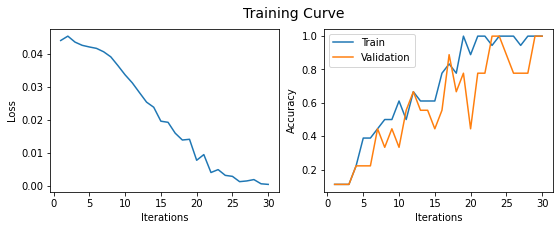

In [ ]:
target_classes = ['A','B','C','D','E','F','G','H','I']
gesture_train_loader, gesture_val_loader = overfit_data_loader(target_classes, batch_size=50)
# Create model
net = GestureRec()
# Begin training
train_net(net, gesture_train_loader, gesture_val_loader, batch_size=50, learning_rate = 0.001, num_epochs=30)

### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

In my opinion the most worth tuning hyperparamenters are **learning rate**, **batch size** and **number of layers** in the neural network. Indeed, if we can find optimal values for batch size and learning rate we can find a tradeoff between overfitting and underfitting and this will allow us to increase the overall accuracy of our model.
Changing the number of layers can instead affect the dimensionality of the neural network architecture and if wwll tuned this paramenter can allow us to reduce the computations expenses of running through iterations.


### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

In [ ]:
# this helper function has been added to make the training process faster
# gpu is being used to process train_net, accuracy and GestureRec
def test_cuda():
    if use_cuda and torch.cuda.is_available():
      return True # CUDA is available
    else:
      return False # CUDA is unavailable

use_cuda = True
test_cuda()

True

Total time elapsed: 338.02 seconds


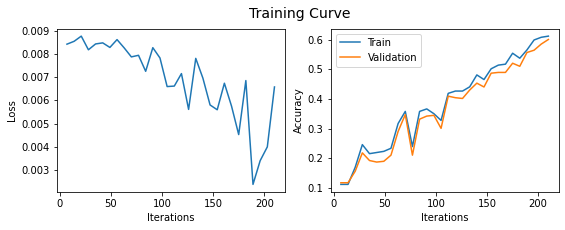

In [ ]:
# FIRST SET OF HYPERPARAMETERS
target_classes = ['A','B','C','D','E','F','G','H','I']
train_loader, val_loader, test_loader, classes = get_data_loader(target_classes, batch_size=256)
net = GestureRec()
use_cuda = True
if (test_cuda()):
  net.cuda() # Using cuda
train_net(net, train_loader, val_loader, batch_size=256, learning_rate = 0.0001, num_epochs=30)

Total time elapsed: 326.85 seconds


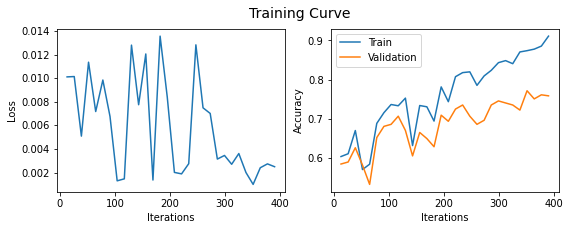

In [ ]:
# SECOND SET OF HYPERPARAMETERS
target_classes = ['A','B','C','D','E','F','G','H','I']
train_loader_2, val_loader_2, test_loader_2, classes_2 = get_data_loader(target_classes, batch_size=128)
use_cuda = True
if (test_cuda()):
  net.cuda() # Using cuda
train_net(net, train_loader_2, val_loader_2, batch_size=128, learning_rate = 0.001, num_epochs=30)

In [ ]:
# For the third and fourth set of hyperparameters 
# I will change the neural network structure

class GestureRec_new(nn.Module):
    def __init__(self): 
        super(GestureRec_new, self).__init__()
        self.name = "GestureRec_new"
        self.conv1 = nn.Conv2d(3, 5, 5) 
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(28090, 90)
        self.fc2 = nn.Linear(90, 32) # New hidden layer added here
        self.fc3 = nn.Linear(32, 9) 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 28090)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return x

Total time elapsed: 340.65 seconds


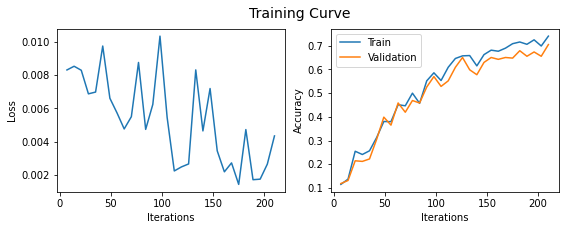

In [ ]:
# THIRD SET OF HYPERPARAMETERS
target_classes = ['A','B','C','D','E','F','G','H','I']
train_loader_3, val_loader_3, test_loader_3, classes_3 = get_data_loader(target_classes, batch_size=256)
net3 = GestureRec_new()
use_cuda = True
if (test_cuda()):
  net3.cuda() # Using cuda
train_net(net3, train_loader_3, val_loader_3, batch_size=256, learning_rate = 0.001, num_epochs=30)

Total time elapsed: 337.25 seconds


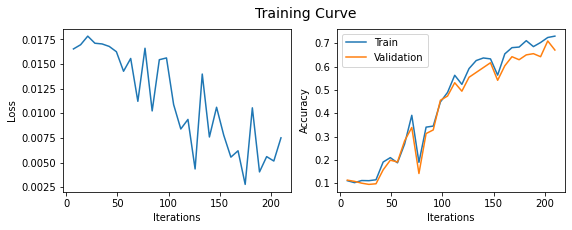

In [ ]:
# FOURTH SET OF HYPERPARAMETERS
target_classes = ['A','B','C','D','E','F','G','H','I']
train_loader_4, val_loader_4, test_loader_4, classes_4 = get_data_loader(target_classes, batch_size=128)
net3 = GestureRec_new()
use_cuda = True
if (test_cuda()):
  net3.cuda() # Using cuda
train_net(net3, train_loader, val_loader, batch_size=128, learning_rate = 0.003, num_epochs=30)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

The best model was able to get was with the THIRD set of hyperparameters tested:

- Batch Size: 256
- Learning rate: 0.001
- Epoch Number: 30
- CNN Architecture: 2 
convolutional layers and 3 fully connected layers

The training/validaiton accuracy increased fairly linearly together and did not diverge. This means that the model is precise for both the training and validation sets and is not prone to overfitting. 
Though the second set of parameters lead to a higher validaiton accuracy, there was significant overfitting as the iterations increased and the loss diminished to zero.




### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

Final test accuracy is 68.4%

In [ ]:
accuracy(net3, test_loader_3)

0.684

### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:
# code very similar to get_data_loader, see comments from above functon
# for simplyfication here I have manually generated the validation dataset 
def ALEX_data_loader(train_path, valid_path, test_path, batch_size=1):
  
    transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
    train_dataset = torchvision.datasets.ImageFolder(train_path, transform=transform)
    valid_dataset = torchvision.datasets.ImageFolder(valid_path, transform=transform)
    test_dataset = torchvision.datasets.ImageFolder(test_path, transform=transform)
    classes = ['A','B','C','D','E','F','G','H','I']
    batch_size = 1 
    num_workers = 1
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True)
    
    # saving computed features as tensors in myDrive
    n=0
    for img, label in train_loader:
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      folder_name = train_path + '/' + str(classes[label])
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n=n+1

    n=0
    for img, label in valid_loader:
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      folder_name = valid_path + '/' + str(classes[label])
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n=n+1
    
    n=0
    for img, label in test_loader:
      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      folder_name = test_path + '/' + str(classes[label])
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n=n+1

    return train_loader, valid_loader, test_loader

In [ ]:
train_path = '/content/drive/MyDrive/APS360_Labs/LAB_3/train_dataset/'
valid_path = '/content/drive/MyDrive/APS360_Labs/LAB_3/valid_dataset/'
test_path = '/content/drive/MyDrive/APS360_Labs/LAB_3/test_dataset/'

train_loader_ALEX, val_loader_ALEX, test_loader_ALEX = ALEX_data_loader(train_path, valid_path, test_path)

### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:
class ALEX_GestureRec(nn.Module):
    def __init__(self):
        super(ALEX_GestureRec, self).__init__()
        self.name = "ALEX_GestureRec"
        self.conv1 = nn.Conv2d(256, 50, 2)
        self.conv2 = nn.Conv2d(50, 10, 2)
        self.fc1 = nn.Linear(10*4*4, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = x.view(-1, 10*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
train_dataset_new = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))
valid_dataset_new = torchvision.datasets.DatasetFolder(valid_path, loader=torch.load, extensions=('.tensor'))
test_dataset_new = torchvision.datasets.DatasetFolder(test_path, loader=torch.load, extensions=('.tensor'))

In [ ]:
def train_AlexNet(model, train_dataset, valid_dataset, batch_size=64, learning_rate=0.001, num_epochs=1):
    num_workers = 1
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True, drop_last = True)
    valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True, drop_last = True)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    iters, losses, train_acc, val_acc = [], [], [], []

    epoch = 0 
    for epoch in range(num_epochs):
        for features, labels in iter(train_loader):
            if use_cuda and torch.cuda.is_available():
              features = features.cuda()
              labels = labels.cuda()
            out = model(features)      
            Loss = criterion(out, labels) 
            Loss.backward()               
            optimizer.step()             
            optimizer.zero_grad()         
        # save the training information
        iters.append(epoch)
        losses.append(float(Loss)/batch_size)            
        train_acc.append(accuracy(model, train_loader)) 
        val_acc.append(accuracy(model, valid_loader))  
        model_path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(3)
    fig.set_figwidth(9)
    fig.suptitle('Training Curve', fontsize=14)
    ax1.plot(iters, losses, label="Train")
    ax1.set(xlabel='Iterations', ylabel='Loss')
    ax2.plot(iters, train_acc, label="Train")
    ax2.plot(iters, val_acc, label="Validation")
    ax2.set(xlabel='Iterations', ylabel='Accuracy')
    ax2.legend(loc='best')
    plt.show()

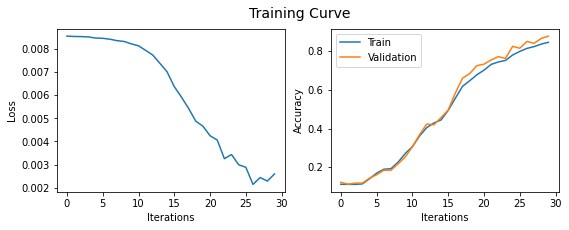

In [ ]:
ALEX_net = ALEX_GestureRec()
use_cuda = True
if (test_cuda()):
  ALEX_net.cuda()
train_AlexNet(ALEX_net, train_dataset_new, valid_dataset_new, batch_size=256, learning_rate = 0.001, num_epochs=30)

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [ ]:
accuracy(ALEX_net, test_dataset_new)

The new test accuracy [78.2%] is greater than the one reached in part 3(d) [68.4%] thanks to the pretrained alexnet model. Indeed, our model has a higher performance because we are feeding it with features that were already extracted by the alex net.

### 5. Additional Testing [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

In [ ]:
classes = ['A','B','C','D','E','F','G','H','I']
additional_test_path = '/content/drive/MyDrive/APS360_Labs/LAB_3/additional_test_dataset'

transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
test_dataset = torchvision.datasets.ImageFolder(additional_test_path, transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, 
                                          num_workers=1, shuffle=True)

n=0
for img, label in test_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())
  folder_name = additional_test_path + '/' + str(classes[label])
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n=n+1

test_dataset_new = torchvision.datasets.DatasetFolder(additional_test_path, loader=torch.load, extensions=('.tensor'))
accuracy(ALEX_net, test_dataset_new)

By using the small dataset I had created in part A as a test dataset I reached a final total accuracy of 92.5%. This means only 3 pictures have been misclassified; this accuracy is much higher than the one reached in part 4(d) and I think this is beacue of the smaller dataset I am using.